In [ ]:
!pip uninstall wfdb

In [ ]:
!pip install wfdb==1.3.9

In [ ]:
!cp "/content/drive/MyDrive/results-MIT-BIH-2.zip" -r "/content"

In [ ]:
!cp "/content/drive/MyDrive/ecg_data_with_labels.csv" -r "/content"

In [ ]:
!cp "/content/drive/MyDrive/ecg_labels.csv" -r "/content"

cp: cannot stat '/content/drive/MyDrive/ecg_labels.csv': No such file or directory


In [ ]:
!cp "/content/drive/MyDrive/mit-bih-arrhythmia-database-1.0.0" -r "/content"

^C


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

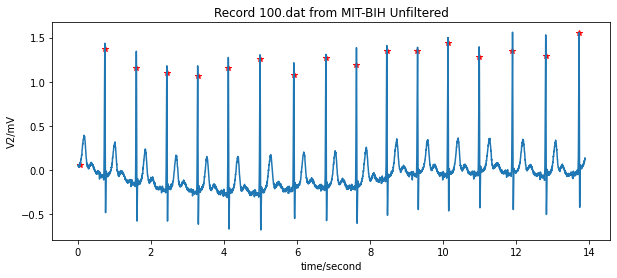

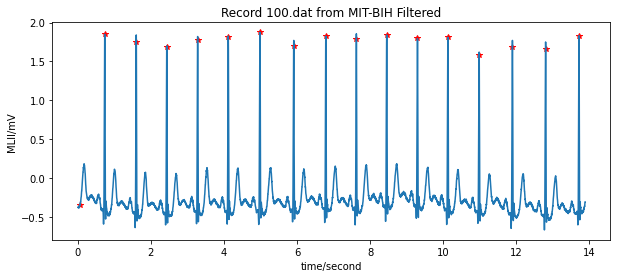

{'adcgain': [200.0],
 'adcres': [11],
 'adczero': [1024],
 'basecounter': None,
 'basedate': None,
 'baseline': [1024],
 'basetime': None,
 'blocksize': [0],
 'byteoffset': [None],
 'checksum': [18263],
 'comments': ['-1 M 742 654 x1', 'Diapres, Xyloprim'],
 'counterfreq': None,
 'd_signals': None,
 'e_d_signals': None,
 'e_p_signals': None,
 'filename': ['103.dat'],
 'fmt': ['212'],
 'fs': 360,
 'initvalue': [949],
 'nsig': 1,
 'p_signals': array([[-0.375],
        [-0.375],
        [-0.375],
        ...,
        [-0.32 ],
        [-0.305],
        [-0.305]]),
 'recordname': '103',
 'sampsperframe': [1],
 'siglen': 5000,
 'signame': ['MLII'],
 'skew': [None],
 'units': ['mV']}

{'recordname': '103', 'extension': 'atr', 'sample': array([  21,  265,  575,  876, 1180, 1482, 1795, 2127, 2444, 2744, 3044,
       3347, 3647, 3954, 4282, 4609, 4939]), 'symbol': ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'], 'subtype': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'chan': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'num': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'aux_note': ['(N\x00', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], 'fs': 360, 'label_store': None, 'description': None, 'custom_labels': None, 'contained_labels': None}


In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy as sp
from scipy import signal
import numpy as np



#MIT-BIH dataset sampled at 360 samples per second. 
#ELM paper denoted 0.65 seconds per heartbeat.
#we will sample from any starting value x to x+0.65*360



def median_filter(signal):
  result_array = []
  #print(signal.shape[0])
  for index in range(0, signal.shape[0]):
    if(index==0):
      temp_array = [0,0,signal[index][0],signal[index+1][0],signal[index+2][0]]
      temp_array.sort()
      #print(temp_array)
      result_array.append([temp_array[2]])
      
    elif(index ==1):
      temp_array = [0, signal[index-1][0], signal[index][0],signal[index+1][0],signal[index+2][0]]
      temp_array.sort()
      #print(temp_array)
      result_array.append([temp_array[2]])
    elif(index == signal.shape[0]-2):
      temp_array=[signal[index-2][0], signal[index-1][0], signal[index][0],signal[index+1][0],0]
      temp_array.sort()
      result_array.append([temp_array[2]])
    elif(index==signal.shape[0]-1):
      temp_array=[signal[index-2][0], signal[index-1][0], signal[index][0],0,0]
      temp_array.sort()
      #print(temp_array)
      result_array.append([temp_array[2]])
    else:
      temp_array = [signal[index-2][0], signal[index-1][0], signal[index][0],signal[index+1][0],signal[index+2][0]]
      temp_array.sort()
      
      result_array.append([temp_array[2]])
  return np.array(result_array)


record = wfdb.rdsamp('/content/mit-bih-arrhythmia-database-1.0.0/103', sampto=5000, channels=[0])
record2 = wfdb.rdsamp('/content/mit-bih-arrhythmia-database-1.0.0/103', sampto=5000, channels = [1])

annotation = wfdb.rdann('/content/mit-bih-arrhythmia-database-1.0.0/103','atr', sampto=5000)

'''record.p_signals = median_filter(record.p_signals)
record.p_signals = median_filter(record.p_signals)'''

#wfdb.plot_wfdb(record, annotation = annotation, title = 'Rec 100 from Arrythmia Database',timeunits = 'seconds', figsize = (10,4), ecggrids = 'all')
#print (record.p_signals)
wfdb.plotrec(record=record2, annotation = annotation, title='Record 100.dat from MIT-BIH Unfiltered',figsize=(10,4), timeunits="seconds") 
wfdb.plotrec(record=record, annotation = annotation, title='Record 100.dat from MIT-BIH Filtered',figsize=(10,4), timeunits="seconds") 

display(record.__dict__)
#print(record.p_signal)
#print(np.median(record.p_signal))
print(annotation.__dict__)
#Annotation R-peaks in annotation.__dict__.array




In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy as sp
from scipy import signal
import numpy as np

#MIT-BIH dataset sampled at 360 samples per second. 
#ELM paper denoted 0.65 seconds per heartbeat.
#we will sample from any starting value x to x+0.65*360


def median_filter(signal):
  result_array = []
  #print(signal.shape[0])
  for index in range(0, signal.shape[0]):
    if(index==0):
      temp_array = [0,0,signal[index][0],signal[index+1][0],signal[index+2][0]]
      temp_array.sort()
      #print(temp_array)
      result_array.append([temp_array[2]])
      
    elif(index ==1):
      temp_array = [0, signal[index-1][0], signal[index][0],signal[index+1][0],signal[index+2][0]]
      temp_array.sort()
      #print(temp_array)
      result_array.append([temp_array[2]])
    elif(index == signal.shape[0]-2):
      temp_array=[signal[index-2][0], signal[index-1][0], signal[index][0],signal[index+1][0],0]
      temp_array.sort()
      result_array.append([temp_array[2]])
    elif(index==signal.shape[0]-1):
      temp_array=[signal[index-2][0], signal[index-1][0], signal[index][0],0,0]
      temp_array.sort()
      #print(temp_array)
      result_array.append([temp_array[2]])
    else:
      temp_array = [signal[index-2][0], signal[index-1][0], signal[index][0],signal[index+1][0],signal[index+2][0]]
      temp_array.sort()
      
      result_array.append([temp_array[2]])
  return np.array(result_array)

names = ["100", "101", "102", "103", "104", "105", "106", "107", "108", "109", "111", "112", "113", "114", "115", "116", "117", "118", "119", "121", "121", "122", "123", "124", "200", "201", "202", "203", "205", "207", "208", "209", "210", "212", "213", "214", "215", "217", "219", "220", "221", "222", "223", "228", "230", "231", "232", "233", "234"]
#names = ["234"]
for filename in names:
  address = '/content/mit-bih-arrhythmia-database-1.0.0/'+filename
  annotation = wfdb.rdann(address,'atr')

  
  
  count = 0
  for item in annotation.symbol: #360*1800 as 1800 secs in half hour and at 360 samples per sec
    if count==0:
      count+=1
      continue
    address = '/content/mit-bih-arrhythmia-database-1.0.0/'+filename
    print(address)
    startsamp = int(annotation.sample[count]-0.25*360)
    endsamp = int(annotation.sample[count]+0.40*360)
    print(annotation.sample[count])
    if startsamp<0:
      startsamp=0
    if count+1 == len(annotation.symbol):
      continue
    if endsamp > 648000:
      endsamp = int(annotation.sample[count+1]-0.25*360)
      
    print(startsamp)
    print(endsamp)


    record = wfdb.rdsamp(address, sampfrom=startsamp, sampto=endsamp, channels=[0])
    #record2 = wfdb.rdsamp(address, sampto=5000, channels = [1])

    

    record.p_signals = median_filter(record.p_signals)
    record.p_signals = median_filter(record.p_signals)

    #record.p_signals = sp.signal.medfilt(record.p_signals,[3,3])

    #wfdb.plot_wfdb(record, annotation = annotation, title = 'Rec 100 from Arrythmia Database',timeunits = 'seconds', figsize = (10,4), ecggrids = 'all')
    #print (record.p_signals)
    #wfdb.plotrec(record=record2, annotation = annotation, title='Record 100.dat from MIT-BIH Unfiltered',figsize=(10,4), timeunits="seconds") 
    #wfdb.plotrec(record=record, annotation = annotation, title='Record 100.dat from MIT-BIH Filtered',figsize=(10,4), timeunits="seconds") 

    #display(record.__dict__)
    #print(record.p_signal)
    #print(np.median(record.p_signal))
    #print(annotation.__dict__)
    #print(record.p_signals.shape)
    #recordname = "100-" + str(1)

    os.chdir("/content/results-MIT-BIH-3")

    recordname = filename+"-"+str(count)
    wfdb.wrsamp(recordname, fs=record.fs, units = record.units, signames = record.signame, p_signals = record.p_signals,gain=record.adcgain,fmt=record.fmt,baseline=record.baseline)
    #annotationname = recordname + "-ann"
    #wfdb.wrann(recordname = recordname, extension = annotation.extension, sample = annotation.sample, symbol = annotation.symbol)
    
    #break
    
    print("{recordname} done",{recordname})
    count+=1
  #break
  print("{address} done", {address})




Streaming output truncated to the last 5000 lines.
411568
{recordname} done {'234-1763'}
/content/mit-bih-arrhythmia-database-1.0.0/234
411660
411570
411804
{recordname} done {'234-1764'}
/content/mit-bih-arrhythmia-database-1.0.0/234
411896
411806
412040
{recordname} done {'234-1765'}
/content/mit-bih-arrhythmia-database-1.0.0/234
412134
412044
412278
{recordname} done {'234-1766'}
/content/mit-bih-arrhythmia-database-1.0.0/234
412373
412283
412517
{recordname} done {'234-1767'}
/content/mit-bih-arrhythmia-database-1.0.0/234
412613
412523
412757
{recordname} done {'234-1768'}
/content/mit-bih-arrhythmia-database-1.0.0/234
412851
412761
412995
{recordname} done {'234-1769'}
/content/mit-bih-arrhythmia-database-1.0.0/234
413085
412995
413229
{recordname} done {'234-1770'}
/content/mit-bih-arrhythmia-database-1.0.0/234
413317
413227
413461
{recordname} done {'234-1771'}
/content/mit-bih-arrhythmia-database-1.0.0/234
413557
413467
413701
{recordname} done {'234-1772'}
/content/mit-bih-arr

In [ ]:
import wfdb
annotation = wfdb.rdann("/content/mit-bih-arrhythmia-database-1.0.0/234", "atr")
print(len(annotation.symbol))
#print(annotation.__dict__)

2764


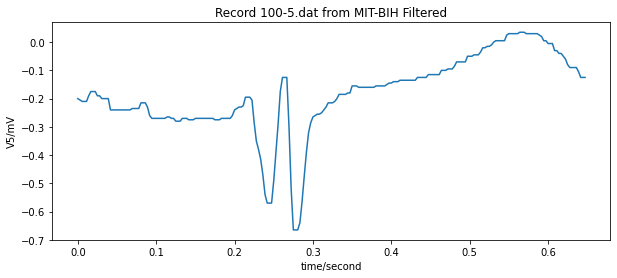

In [ ]:
count=30
address = "/content/results-MIT-BIH-3/114-"+str(count)
record = wfdb.rdsamp(address)
#record2 = wfdb.rdsamp(address, sampto=5000, channels = [1])
#annotation = wfdb.rdann(address,'atr')

#annotation.sample = np.array([annotation.sample[count]])
#annotation.symbol = np.array([annotation.symbol[count]])
#display(annotation.__dict__)

wfdb.plotrec(record=record, title='Record 100-5.dat from MIT-BIH Filtered',figsize=(10,4), timeunits="seconds")

In [ ]:
!zip -r '/content/results-MIT-BIH-3.zip' '/content/results-MIT-BIH-3'

In [ ]:
!unzip -q '/content/results-MIT-BIH-3.zip'

In [ ]:
!cp "/content/results-MIT-BIH-3.zip" -r "/content/drive/MyDrive"

In [ ]:
import pandas as pd
import wfdb
#names = ["100", "101", "102", "103", "104", "105", "106", "107", "108", "109", "111", "112", "113", "114", "115", "116", "117", "118", "119", "121", "121", "122", "123", "124", "200", "201", "202", "203", "205", "207", "208", "209", "210", "212", "213", "214", "215", "217", "219", "220", "221", "222", "223", "228", "230", "231", "232", "233", "234"]
names=["234"]
record_index = 0
beat_index = 0
count=111713
datafile = pd.read_csv("/content/ecg_data_with_labels-2.csv")
while record_index<48:
  address="/content/mit-bih-arrhythmia-database-1.0.0/"+names[record_index]
  annotation = wfdb.rdann(address,'atr')
  print(len(annotation.symbol))
  while beat_index<=len(annotation.symbol)-2:
    datafile.loc[count,"record"] = names[record_index]
    datafile.loc[count,"beat"]=beat_index
    datafile.loc[count,"label"]=annotation.symbol[beat_index+1]
    count+=1
    beat_index+=1
  beat_index=0
  record_index+=1
  break

datafile.to_csv("ecg_heartbeat_data_with_labels-3.csv", index=False)




2764


In [ ]:
import pandas as pd
import wfdb 

df = pd.read_csv("/content/ecg_labels.csv")

for index, row in df.iterrows():
  if(row["beat"]==1 or row["beat"]==0):
    continue
  address="/content/results-MIT-BIH-3/"+str(int(row["record"]))+"-"+str(int(row["beat"]))
  record = wfdb.rdsamp(address)
  count = 0
  for item in record.p_signals:
    df.loc[index, "x-"+str(count)]=item
    count+=1
  print(address, "done")
df.to_csv("ecg_data_with_labels-2.csv", index=False)

!cp "ecg_data_with_labels-2.csv" "/content/drive/MyDrive"


Streaming output truncated to the last 5000 lines.
/content/results-MIT-BIH-3/208-1224 done
/content/results-MIT-BIH-3/208-1225 done
/content/results-MIT-BIH-3/208-1226 done
/content/results-MIT-BIH-3/208-1227 done
/content/results-MIT-BIH-3/208-1228 done
/content/results-MIT-BIH-3/208-1229 done
/content/results-MIT-BIH-3/208-1230 done
/content/results-MIT-BIH-3/208-1231 done
/content/results-MIT-BIH-3/208-1232 done
/content/results-MIT-BIH-3/208-1233 done
/content/results-MIT-BIH-3/208-1234 done
/content/results-MIT-BIH-3/208-1235 done
/content/results-MIT-BIH-3/208-1236 done
/content/results-MIT-BIH-3/208-1237 done
/content/results-MIT-BIH-3/208-1238 done
/content/results-MIT-BIH-3/208-1239 done
/content/results-MIT-BIH-3/208-1240 done
/content/results-MIT-BIH-3/208-1241 done
/content/results-MIT-BIH-3/208-1242 done
/content/results-MIT-BIH-3/208-1243 done
/content/results-MIT-BIH-3/208-1244 done
/content/results-MIT-BIH-3/208-1245 done
/content/results-MIT-BIH-3/208-1246 done
/conte

In [ ]:
!cp "/content/drive/MyDrive/ecg_data_with_labels-5_cleaned.csv" "/content"

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/ecg_data_with_labels-5.csv")
df = df[df["x-234"].isnull()]
df = df.iloc[: , :237]
df = df.dropna()

df.to_csv("ecg_data_with_labels-5_cleaned.csv", index=False)


In [ ]:
!cp "ecg_data_with_labels-5_cleaned-2.csv" "/content/drive/MyDrive"

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/ecg_data_with_labels-5_cleaned.csv")
df = df[df["record"]!=108]
df = df[df["record"]!=117]
df = df[df["record"]!=200]
df = df[df["record"]!=207]
df.to_csv("ecg_data_with_labels-5_cleaned-2.csv")